In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense,Flatten, Dropout

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [16]:
train = pd.read_csv("G:/Semester 5/Neuro Computing/data/train.csv")
test = pd.read_csv("G:/Semester 5/Neuro Computing/data/test.csv")
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocessing

In [3]:
X = train.drop(['label'], 1).values
y = train['label'].values
X = X / 255.0
X = X.reshape(-1,28,28,1)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_13676/1041264631.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop(['label'], 1).values


### Konversi label

In [4]:
y = to_categorical(y)
print(f"Label size {y.shape}")

Label size (42000, 10)


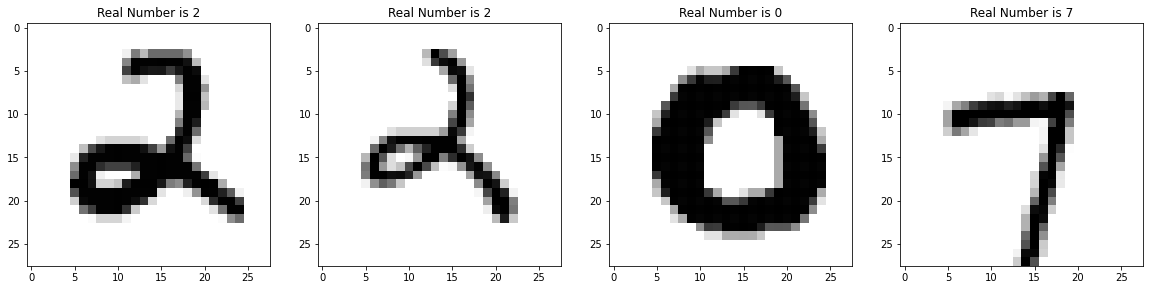

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.1, random_state=0)

#Reshape
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");


### Mean dan Standard Deviation

In [6]:
mean = np.mean(X_train)
std = np.std(X_train)
def standardize(x):
    return (x-mean)/std

### CNN Model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

### Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Compile Model

In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train,
epochs=10,
batch_size=350,
verbose=2,
validation_split=0.6)

Epoch 1/10
44/44 - 59s - loss: 1.1076 - accuracy: 0.6397 - val_loss: 0.3247 - val_accuracy: 0.9027 - 59s/epoch - 1s/step
Epoch 2/10
44/44 - 79s - loss: 0.3099 - accuracy: 0.9052 - val_loss: 0.1632 - val_accuracy: 0.9530 - 79s/epoch - 2s/step
Epoch 3/10
44/44 - 37s - loss: 0.1870 - accuracy: 0.9437 - val_loss: 0.1116 - val_accuracy: 0.9659 - 37s/epoch - 839ms/step
Epoch 4/10
44/44 - 37s - loss: 0.1410 - accuracy: 0.9586 - val_loss: 0.0938 - val_accuracy: 0.9712 - 37s/epoch - 832ms/step
Epoch 5/10
44/44 - 36s - loss: 0.1107 - accuracy: 0.9671 - val_loss: 0.0754 - val_accuracy: 0.9770 - 36s/epoch - 819ms/step
Epoch 6/10
44/44 - 35s - loss: 0.0874 - accuracy: 0.9727 - val_loss: 0.0700 - val_accuracy: 0.9783 - 35s/epoch - 803ms/step
Epoch 7/10
44/44 - 37s - loss: 0.0795 - accuracy: 0.9749 - val_loss: 0.0623 - val_accuracy: 0.9807 - 37s/epoch - 831ms/step
Epoch 8/10
44/44 - 35s - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.0604 - val_accuracy: 0.9816 - 35s/epoch - 784ms/step
Epoch 9/10
44/

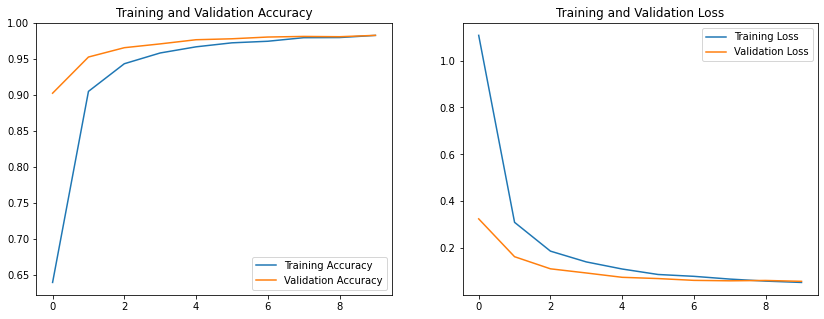

In [10]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix Plotting

132/132 [==============================] - 6s 17ms/step


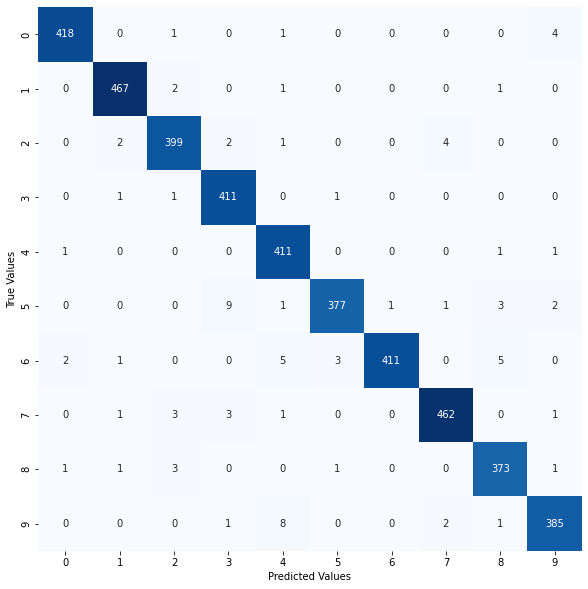

In [11]:
fig = plt.figure(figsize=(10, 10)) # Set Figure
y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues,fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

### Classification Report

In [12]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       422
           1       0.99      0.99      0.99       473
           2       0.98      0.98      0.98       409
           3       0.99      0.96      0.98       426
           4       0.99      0.96      0.98       429
           5       0.96      0.99      0.97       382
           6       0.96      1.00      0.98       412
           7       0.98      0.99      0.98       469
           8       0.98      0.97      0.98       384
           9       0.97      0.98      0.97       394

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



### Evaluasi Model

In [13]:
model.evaluate(X_test, y_test, verbose=False)

[0.07073982059955597, 0.9795238375663757]

### Prediksi

132/132 [==============================] - 2s 17ms/step


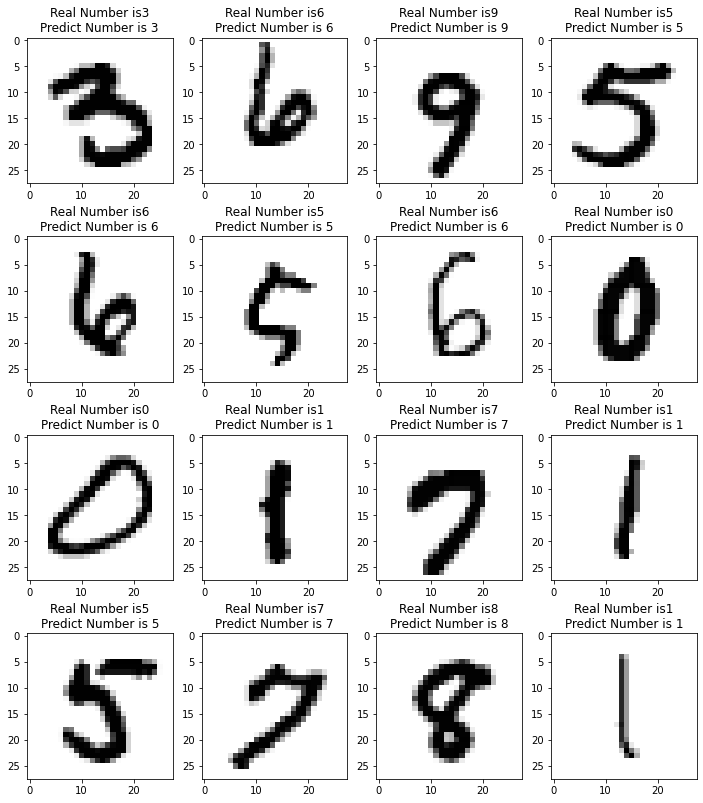

In [14]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is{y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

### Testing 

875/875 [==============================] - 24s 18ms/step


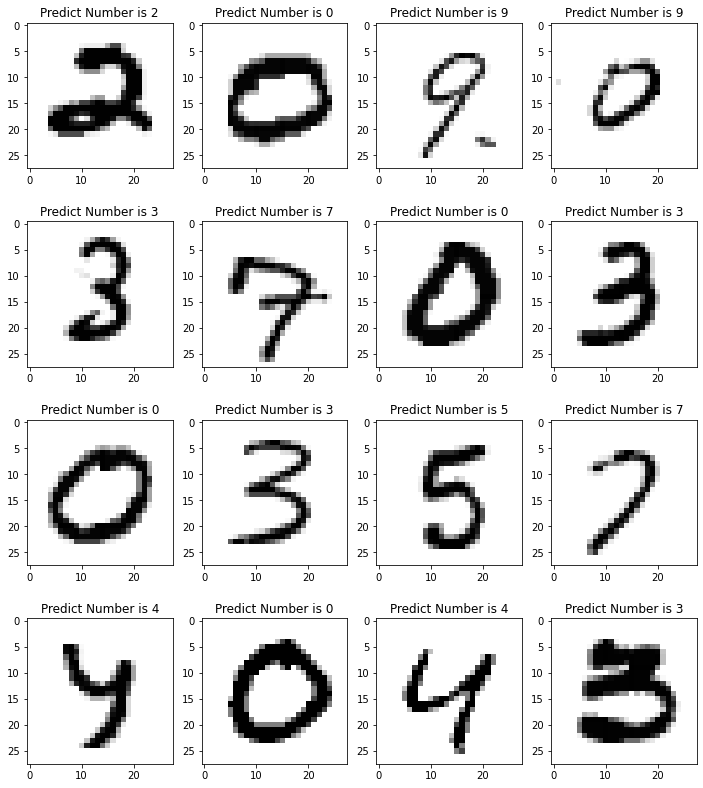

In [15]:
test_x = test.values
test_x = test_x / 255.0
test_x = test_x.reshape(-1,28,28,1)

pred_x = model.predict(test_x)
test_x__ = test_x.reshape(test_x.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_x__[i], cmap='binary')
    ax.set(title = f"Predict Number is {pred_x[i].argmax()}");